<center><h1>Analyse de sentiment</title></center>
<center>


On analyse les sentiment d'un simple tableau de phrase grace aux librairie vader et spacy.
On utilise aussi des outils de visualisation, de traduction et de classification.  


![image info](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTu1AqvDGvi1bvwMkaqyZSDNrdOtKosw8T8yA&usqp=CAU)
</center>

In [ ]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

!pip install googletrans
import googletrans
from googletrans import Translator

!pip install feedparser
import feedparser

In [ ]:
import plotly.express as px
import pandas as pd

import re
import string

import spacy


In [ ]:
!pip install -U spacy

In [ ]:
import spacy.cli
spacy.cli.download("fr_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
from spacy.lang.fr.stop_words import STOP_WORDS as stopWordFR
from spacy import displacy
from IPython.display import SVG, display

Load french spacy model.

In [ ]:
nlpFR = spacy.load('fr_core_news_sm')

Our test data

In [ ]:
phrases = [
  "Je pense donc je suis",
  "Le plus grand plaisir dans la vie, c’est de faire les choses que les gens disent impossibles",
  "Je connais mes limites, c’est pourquoi je vais au-delà.",
  "Un homme est bien fort quand il s’avoue sa faiblesse",
  "On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux",
  "Il est intolérable d'avoir le vice d'intolérance",
  "Fais de ta vie un rêve, et d’un rêve, une réalité",
  "Rien de grand ne s’est fait dans le monde sans passion",
  "Il faut manger pour vivre, et non pas vivre pour manger",
  "Je veux être ton ‘bonjour’ préféré et ton plus dur ‘au revoir’",
  "Si j’avais le choix entre la vie et toi, je te choisirais car tu es ma seule raison de vivre"
]

In [ ]:
def showSVG(s):
  display(SVG(s))

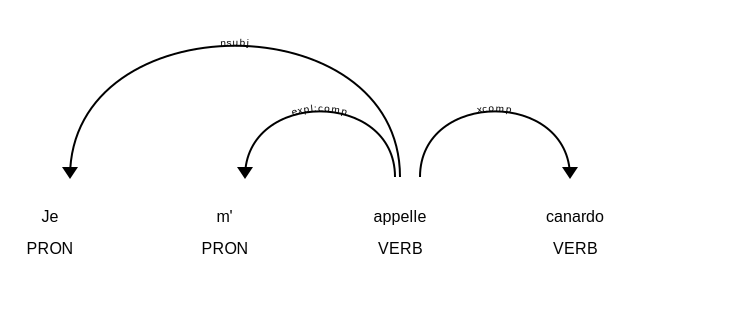

In [ ]:
doc = nlpFR("Je m'appelle canardo")
graph01 = displacy.render(doc)
showSVG(graph01)

## sentiment

In [ ]:
readSentiment = SentimentIntensityAnalyzer()


In [ ]:
for txt in phrases:
  print(readSentiment.polarity_scores(txt))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7184}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
def getSentiment(phrase):
  s = readSentiment.polarity_scores(phrase)
  if s['compound'] <= -0.05:
    sentiment = 0
  elif s['compound'] >= 0.05:
    sentiment = 1
  else:
    sentiment = 2
  return sentiment, s

In [ ]:
sentiments = ['Negative', 'Positive', 'Neutral']
for txt in phrases:
  print(sentiments[getSentiment(txt)[0]], ' - ', txt)

Neutral  -  Je pense donc je suis
Positive  -  Le plus grand plaisir dans la vie, c’est de faire les choses que les gens disent impossibles
Neutral  -  Je connais mes limites, c’est pourquoi je vais au-delà.
Neutral  -  Un homme est bien fort quand il s’avoue sa faiblesse
Neutral  -  On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux
Neutral  -  On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux
Neutral  -  Fais de ta vie un rêve, et d’un rêve, une réalité
Positive  -  Rien de grand ne s’est fait dans le monde sans passion
Neutral  -  Il faut manger pour vivre, et non pas vivre pour manger
Neutral  -  Je veux être ton ‘bonjour’ préféré et ton plus dur ‘au revoir’
Neutral  -  Si j’avais le choix entre la vie et toi, je te choisirais car tu es ma seule raison de vivre


In [ ]:
sources = [
'https://feeds.leparisien.fr/leparisien/rss/faits-divers',
'https://feeds.leparisien.fr/leparisien/rss/politique',
'https://feeds.leparisien.fr/leparisien/rss/economie',
'https://feeds.leparisien.fr/leparisien/rss/international',  
'https://feeds.leparisien.fr/leparisien/rss/sports',
'https://feeds.leparisien.fr/leparisien/rss/culture-loisirs',
'https://feeds.leparisien.fr/leparisien/rss/environnement'  
]
feeds = []
for s in sources:
  feed = feedparser.parse(s)
  feeds.append(feed)

In [ ]:
titles = []
summaries = []
for feed in feeds:
  for content in feed.entries:
    titles.append(content.title)
    try:
      summaries.append(content.summary)
    except:
      summaries.append(content.title)

In [ ]:
def cleaningText(original, show=False):
  txt = original
  txt = txt.lower() # lowercase
  txt = re.sub('@','',txt) # remove @ 
  txt = re.sub('\[.*\]','',txt) # remove contents between brackets
  txt = re.sub('<.*?>+','',txt) # remove contents between less and more signs
  txt = re.sub('https?://\S+|www\.\S+', '', txt) # remove URLs
  txt = re.sub(re.escape(string.punctuation), '', txt) # remove punctuation
  txt = re.sub(r'[^a-zA-Z ]+', '', txt) # remove numbers
  txt = re.sub('\n', '', txt) # remove line break
  txt = str(txt).strip()
  if show:
    print('ORIGINAL: ', original)
    print('   TEXT CLEANNED: ', txt)
  return txt

In [ ]:
titlesClean = [cleaningText(title) for title in titles]


In [ ]:
sent = []
for txt in titles:
  sent.append(getSentiment(txt)[0])

dfT = pd.DataFrame()
dfT['title'] = titles
dfT['titleClean'] = titlesClean
dfT['sentimentTitle'] = sent

In [ ]:
dfTitle = dfT[['sentimentTitle','title']].groupby('sentimentTitle').count()


In [ ]:
dfTitle['sentiment'] = sentiments
dfTitle

,title,sentiment
sentimentTitle,,
0,26,Negative
1,34,Positive
2,162,Neutral


In [ ]:
colors=['orange', 'Darkblue', 'Darkred']
px.pie(dfTitle, names='sentiment', values='title', 
       title='Analyse des sentiments - Titres', color_discrete_sequence=colors)

In [ ]:
def tokenizeStr(original):
  txt2 = nlpFR(original) # créer une liste de mots
  txt2 = [token.lemma_ for token in txt2 if not nlpFR.vocab[token.text].is_stop]
  punct = string.punctuation
  stopwords = list(stopWordFR)
  ws = string.whitespace
  txt2 = [word for word in txt2 if word not in stopwords and word not in punct if len(word)>2]
  return txt2

In [ ]:
wordsT = [word for i in range(0, len(dfT)-1) for word in tokenizeStr(dfT.iloc[i].titleClean) if str(word).strip() != '']
wordsTn = pd.value_counts(wordsT)

In [ ]:
wordlist = pd.value_counts(wordsT)


In [ ]:
topW = pd.DataFrame(data={'tag': wordlist.index, 'count':wordlist.values})


In [ ]:
px.bar(topW[:10], y='tag', x='count', orientation='h', 
       title='Top 10 mots', color='tag')

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS as stc
stopwordsCloud = set(stc)

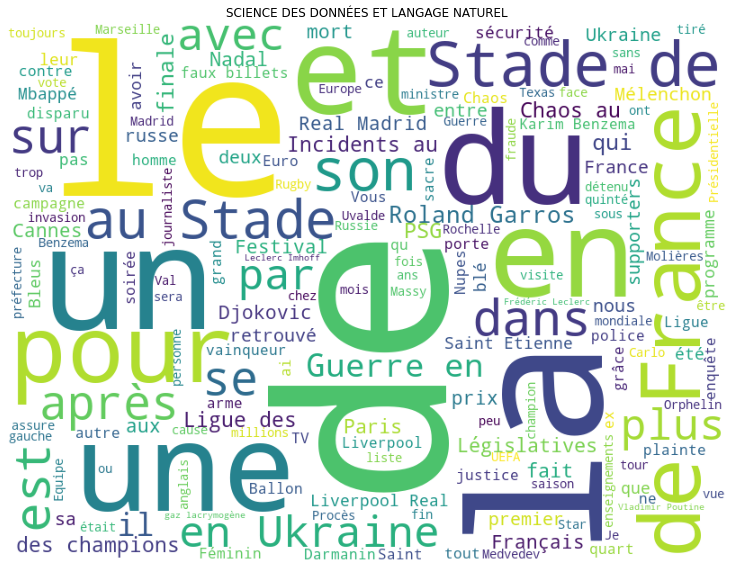

In [ ]:
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                stopwords = stopwordsCloud, 
                min_font_size = 10).generate(' '.join(dfT.title)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('SCIENCE DES DONNÉES ET LANGAGE NATUREL')
  
plt.show() 